# This should walk you through how to use our software

In [1]:
#First import all the relevant functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys,time

#Then import my prewritten classes
from RunningTheCode import RunTheProgram
from PhantomAndMap import Phantom, PatientData

Now you need to export a .xlsx file from OpenREM:
Go to OpenREM -> Fluoroscopy -> (set your preferences and press 'Submit') -> XLSX export

Save this wherever you want and keep note of the destination.

In [2]:
Testfile = 'TestDataset.xlsx' #The destination
#(This is a fake dataset produced to demonstrate the code)

In [3]:
''' We have a simple Phantom model called Phantom'''
#return Phantom parameters based on Patient size
Height = 170 #cm
Weight = 70 #kg
P = Phantom(Height, Weight)

In [4]:
#This gives multiple values:
CR = P.CurvatureRadius
FW = P.Flattenedwidth
print(f'Curve radius = {CR}, Flat Width = {FW}')

Curve radius = 12.00490095997562, Flat Width = 15.006126199969524


In [5]:
P2 = Phantom(180, 90, 45, 10)
#Now, as well as CR and FW,  we can extract
PrDisp = P2.PrimaryDisplacement
ScDisp = P2.SecondaryDisplacement
ICB = P2.CentreToBeamEntry
print(f'Primary Displacement = {PrDisp} \nSecondary Displacement = {ScDisp} \nIsocentre to point on skin where beam hits the patient: {ICB} \n(all units are in cm)')

Primary Displacement = 12.602177215728927 
Secondary Displacement = 3.1232960444313673 
Isocentre to point on skin where beam hits the patient: 17.98636010864247 
(all units are in cm)


Note: to save time in loops we can simply define the patient parameters:

In [6]:
P2 = Phantom(None, None, 45, 10, CurvatureRadius = 12, Flattenedwidth = 15)
#Now, as well as CR and FW,  we can extract
PrDisp = P2.PrimaryDisplacement
ScDisp = P2.SecondaryDisplacement
ICB = P2.CentreToBeamEntry
print(f'Primary Displacement = {PrDisp} \nSecondary Displacement = {ScDisp} \nIsocentre to point on skin where beam hits the patient: {ICB} \n(all units are in cm)')

Primary Displacement = 11.431620648268499 
Secondary Displacement = 2.8331878643647332 
Isocentre to point on skin where beam hits the patient: 16.31569228756137 
(all units are in cm)


## We can extract information from the test file using Runtheprogram and PatientData

In [7]:
#First just use RunTheProgram
UseTestdata = RunTheProgram(Testfile)
print(UseTestdata)

This module returns a pandas dataset (use .Dataframe) 
You can then process this dataframe for an individual Accession or over the entire dataset 


In [8]:
#Now we can get the data in the form of a dataframe
sourcedata = UseTestdata.Dataframe

In [9]:
#If we filter the dataset according to one specific patients data:
AccessionNumber = ['REFNu10'] #This is a fake patient
df = sourcedata.loc[sourcedata['Accession number'].isin(AccessionNumber)]

In [10]:
#we can discover a lot about the patient using Patient Data
Patient = PatientData(df)
print(Patient)

#Note here I'm going to also define a patient where the accuracy is turned up
AcPatient = PatientData(df, GreaterAccuracy = True)

Patient REFNu10 recieved a peak skin dose of 0.16 Gy


In [11]:
#For example:
print(f'The study was {Patient.Study}, \n'\
      f'performed on {Patient.Date} \n'\
      f'The Patient was {Patient.Age} years old,\n'\
      f'and of sex {Patient.Sex}')

The study was Cardiac Angio coronaries, 
performed on 1902-09-26 00:00:00 
The Patient was 58.5 years old,
and of sex M


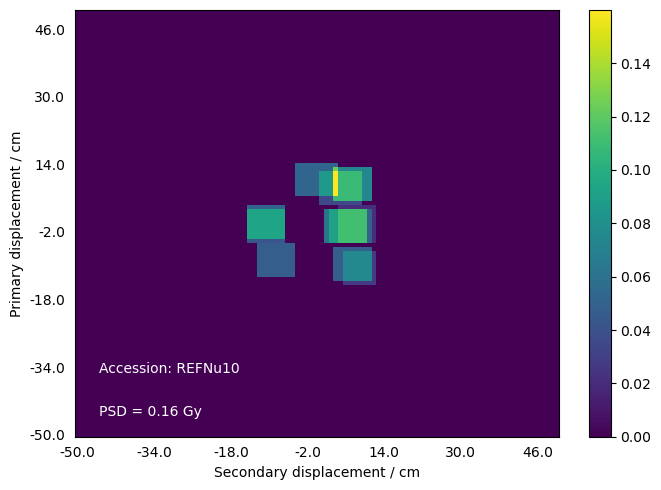

In [12]:
#We can plot the patients exam using:
Patient.PlotMap()

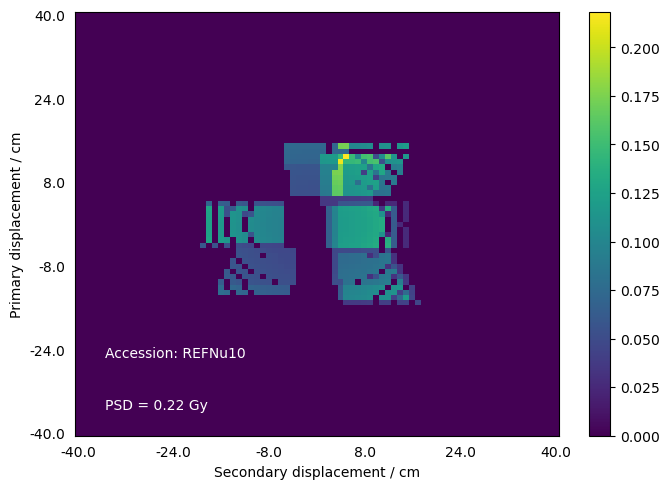

In [13]:
#we can do the same with our 'More Accurate Patient'
AcPatient.PlotMap()


## Alternatively this can all be completed automatically using RuntheProgram

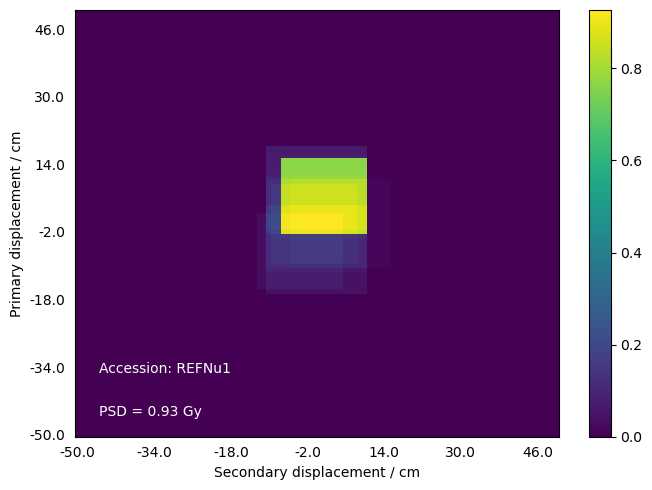

PSD = 0.927 Gy


In [14]:
# We already defined UseTestdata: Note this outputs a map and all the relevant data
AccessionNumber = ['REFNu1'] #This is another fake patient
Patientinfo = UseTestdata.IndividualsData(AccessionNumber)

In [15]:
#If we view the returned value, we can see that it takes the same form as a PatientData output
print(Patientinfo)

Patient REFNu1 recieved a peak skin dose of 0.93 Gy


In [16]:
#For example:
print(f'The study was {Patientinfo.Study}, \n'\
      f'performed on {Patientinfo.Date} \n'\
      f'The Patient was {Patientinfo.Age} years old,\n'\
      f'and of sex {Patientinfo.Sex}')

The study was Angio splenic, 
performed on 1902-09-26 00:00:00 
The Patient was 57.6 years old,
and of sex F


In [17]:
#There is an additional output however:
print(f'{Patientinfo.String}')

PSD = 0.927 Gy


## We can also process an entire dataset

In [18]:
'''If we want to process the entire dataset we can use'''
#Note: This may take some time
entiredataframe = UseTestdata.EntireDataset()

This may take a while. Cycle Starting...
Progress at 9.1%
Progressed to 100% Completed!
Total time = 0.28 min


In [19]:
print(entiredataframe)

         Date Accession number Operator          Study description   Age Sex  \
0  1902-09-26           REFNu1  not inc              Angio splenic  57.6   F   
1  1902-09-26          REFNu10  not inc   Cardiac Angio coronaries  58.5   M   
2  1902-09-26          REFNu11  not inc   Cardiac Angio coronaries  51.4   M   
3  1902-09-26           REFNu2  not inc                       ERCP  72.0   M   
4  1902-09-26           REFNu3  not inc    ERCP and sphincterotomy  60.6   M   
5  1902-09-26           REFNu4  not inc       Angio Lower Limbs Rt  67.7   F   
6  1902-09-26           REFNu5  not inc                       ERCP  83.8   F   
7  1902-09-26           REFNu6  not inc       Angio Lower Limbs Rt  66.1   M   
8  1902-09-26           REFNu7  not inc       Angio Lower Limbs Lt  92.6   F   
9  1902-09-26           REFNu8  not inc  Fistulogram upper Limb Rt  52.8   M   
10 1902-09-26           REFNu9  not inc   Cardiac Angio coronaries  57.0   F   

    Height  Weight   RPdose      DAP   

This can be saved using entiredataframe.to_csv(args)